# 02 Afficher des matrices de pixels

Les [ndarray](https://numpy.org/doc/stable/reference/arrays.ndarray.html) sont les matrices à N dimensions de NumPy. En connaissez-vous les bases ?

In [1]:
import numpy as np

Déclarez une matrice contenant deux lignes à trois colonnes avec les 6 premiers entiers. Pouvez-vous déclarer chacun des chiffres comme un entier sur 32 bits ?

In [2]:
# 02.01
x = np.array([[1,2,3], [4,5,6]], np.int32)
print(f'le type de x est {type(x)} et les données dans x sont du type {x.dtype}')

le type de x est <class 'numpy.ndarray'> et les données dans x sont du type int32


Retrouver la forme (`shape`) de la matrice X.

In [3]:
# 02.02
x.shape

(2, 3)

Savez vous re-recréer la matrice `x` en utlisant `np.arange` et `reshape`.

In [4]:
# 02.03
x = np.arange(1,7).reshape(2,3)
print(x)

[[1 2 3]
 [4 5 6]]


Savez vous faire l'inverse ? Redonner à `x` la forme d'une liste simple. Imprimez cette liste. Il existe plusieurs solutions.

indications: utilisez la méthode `flat` ou la methode `reshape`. Se rappelez aussi de l'utilité de `*` pour les listes.

In [5]:
# 02.04.01
print(list(x.flat))  # il faut utiliser `list` pour obtenir le résultat sous forme de liste

[1, 2, 3, 4, 5, 6]


In [10]:
# 02.04.02
print(list(*x.reshape(1, x.size)))  # le `*` enlève ici un étage de crochets

[1, 2, 3, 4, 5, 6]


## Passer en mode visuel

La fonction [matplotlib.pyplot.imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) permet d'afficher une matrice sous forme d'image. Voici ci dessous les lignes qui permettent de faire une visualisation de la matrice `x`. 

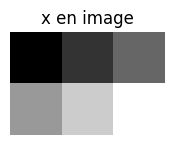

In [20]:
# 02.04.03
import matplotlib.pyplot as plt
plt.figure(figsize=(2,2))
plt.imshow(x, cmap="gray")
plt.title('x en image')
plt.axis("off")
plt.show()

Les valeurs sont typiquement entre 0 et 255. construire une matrice carrée contenant toutes ces valeurs et l'afficher

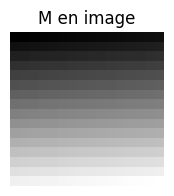

In [21]:
#02.04.04
M = np.array([x for x in range(256)]).reshape(16,16)
plt.figure(figsize=(2,2))
plt.imshow(M, cmap="gray")
plt.title('M en image')
plt.axis("off")
plt.show()

Avec la méthode de construction, le dégradé horizontal est beaucoup moins visible que le dégradé vertical. Connaissez-vous le moyen le plus rapide pour avoir à partir de ce résultat un dégradé plutôt vertical ? (on ne pré-occupe pas du sens du dégradé).

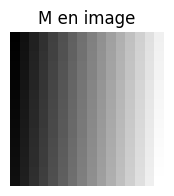

In [22]:
# 02.04.05
plt.figure(figsize=(2,2))
plt.imshow(M.T, cmap="gray")
plt.title('M en image')
plt.axis("off")
plt.show()

Construire une ligne de carrés noirs et blancs alternés. Le nombre de carrés est paramétrable (voir ci-dessous) ainsi que la taille en pixel des carrés.

La méthode proposée est de construire d'abord une ligne de un pixel qui aura la bonne alternance entre les pixels noir (valeur à 0) et les pixels blancs (valeur à 255). Puis de multiplier ces lignes et d'en faire une matrice affichable avec `imshow`.

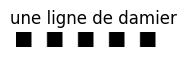

In [23]:
# 02.04.06

taille_carré = 8
nombre_carrés = 10
taille_damier = taille_carré * nombre_carrés

# construction d'un segment de pixels noirs
LCN = [0] * taille_carré
# construction d'un segment de pixels blancs
LCB = [255] * taille_carré

# construction d'une ligne commençant par un carré noir
LN = []
for pos in range(nombre_carrés):
    if pos % 2 == 0:
        LN.extend(LCN)  # ne pas utiliser append() !
    else:
        LN.extend(LCB)
# donner de l'épaisseur à notre ligne
LN = LN * taille_carré

# mise ne matrice pour l'affichage
ligne = np.array(LN)  # convertir la liste en ndarray
ligne = ligne.reshape(taille_carré, taille_damier)

# affichage
plt.figure(figsize=(2,2))
plt.imshow(ligne, cmap='gray')
plt.axis('off')
plt.title('une ligne de damier')
plt.show()

Empiler maintenant les lignes commençant par un carré noir et un carré blanc. Afficher le damier résultant.

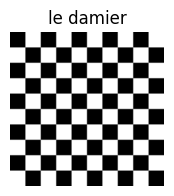

In [24]:
# 02.04.06

# construction d'une ligne commençant par un carré blanc
LB = []
for pos in range(nombre_carrés):
    if pos % 2 == 0:
        LB.extend(LCB)
    else:
        LB.extend(LCN)
# donner de l'épaisseur à notre ligne
LB = LB * taille_carré

# construction du damier (toujours avec des lignes)
DAM = []
for L in range(nombre_carrés):
    if L % 2 == 0:
        DAM.extend(LN)
    else:
        DAM.extend(LB)
# mise ne matrice
image = np.array(DAM)  # convertir la liste en ndarray
image = image.reshape(taille_damier, taille_damier)

plt.figure(figsize=(2,2))
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title('le damier')
plt.show()

On veut maintenant encadrer le damier par une ligne de deux pixels...

Cette fois rester avec la matrice qui vient d'être construite et rajouter des lignes et des colonnes avec la commande de NumPy [concatenate](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html).

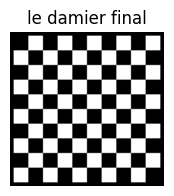

In [25]:
# 02.04.07

# construction d'une ligne horizontale d'épaisseur 2
LG = np.zeros((2,taille_damier))
# ajout de la ligne du haut
image = np.concatenate((LG, image), axis = 0)
# ajout de la ligne du bas
image = np.concatenate((image, LG), axis = 0)

# construction d'une ligne vertical d'épaisseur 2
LG = np.zeros((taille_damier + 4, 2))  # attention à ajouter les lignes haut et bas
# ajout de la ligne de gauche
image = np.concatenate((LG, image), axis = 1)
# ajout de la ligne du bas
image = np.concatenate((image, LG), axis = 1)

plt.figure(figsize=(2,2))
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title('le damier final')
plt.show()